Projeto - Aplicação de Redes Neurais
Objetivo: O aluno deverá ser capaz de realizar uma análise completa dos
dados e projetar uma rede neural para resolver o problema. Avaliar os
resultados obtidos através das métricas de classificação
Problema: De posse de dados que correspondem a sinais de transitórios
de eletrodomésticos (sinais obtidos em uma janela de 2s ao se ligar
equipamento) e que foram rotulados em 7 diferentes classes, o aluno
deverá realizar os seguintes passos:
1) Carregar os dados e realizar a limpeza dos dados (se necessário)
2) Visualizar os dados para compreensão (dica: plotar 1 exemplo de cada
Classe). Como na Figura 1 , abaixo, que representa um
eletrodoméstico da Classe 1
3) Como é um problema muticlasse, o aluno deverá transformar os
labels para uma representação correta.
4) Preparar os dados para se apresentados à ML
5) Construir a rede neural com seus respectivos parâmetros (taxa de
aprendizado, número de camadas intermediárias, número de neurônios, batch_size etc). O aluno deve propor uma estratégia para
determinar esses parâmetros.
6) Testar e validar os resultados
7) Avaliar o usa de PCA (Análise de Componentes Principais) para
visualização dos dados e também como speed-up da ML (para fins de
classificação).
8) Conclusão

In [233]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() 
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from scipy import stats
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix

In [234]:
data = "C:/Users/laiss/OneDrive/Arquivos/analista de dados/Redes Neurais/projeto/db.csv"

In [235]:
df = pd.read_csv(data) # carregando os dados

In [236]:
df.head()

,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,...,t191,t192,t193,t194,t195,t196,t197,t198,t199,Classes
0,24.00,24.00,23.00,25.00,24.00,25.00,24.00,24.00,22.00,25.00,...,1.00,-1.00,1.00,-1.00,1.00,0.00,1.00,0.00,0.00,1
1,23.00,23.00,22.00,21.00,21.00,22.00,23.00,23.00,22.00,21.00,...,-1.00,1.00,0.00,1.00,-1.00,0.00,-1.00,1.00,0.00,1
2,-0.55,-0.55,-0.55,3.45,13.45,11.45,18.45,18.45,20.45,20.45,...,-0.55,0.45,-0.55,0.45,-0.55,0.45,-0.55,0.45,-0.55,1
3,12.30,10.30,15.30,15.30,16.30,15.30,17.30,16.30,17.30,15.30,...,-0.70,0.30,-0.70,0.30,-0.70,1.30,-0.70,1.30,-0.70,1
4,24.85,2.85,5.85,-1.15,2.85,-1.15,1.85,-1.15,0.85,-1.15,...,-0.15,0.85,-1.15,-0.15,-1.15,0.85,-0.15,0.85,-0.15,2


In [237]:
df.shape

(100, 201)

In [238]:
df.isnull().sum()#verificando se tem nulos. Não irei dropar duplicata porque pelo problema verifico que o eletrodomestico pode se comportar igual

t0         0
t1         0
t2         0
t3         0
t4         0
          ..
t196       0
t197       0
t198       0
t199       0
Classes    0
Length: 201, dtype: int64

In [239]:
labels = df['Classes'].unique() # observando os grupos de classes

In [240]:
labels

array([1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [241]:
def PlotGraf(df,classe,linha):  #código para plotar os gáficos
    df_fig = df[df['Classes'] == classe]
    fig = df_fig.iloc[linha,:-1].plot(figsize = (8, 2))
    plt.show()


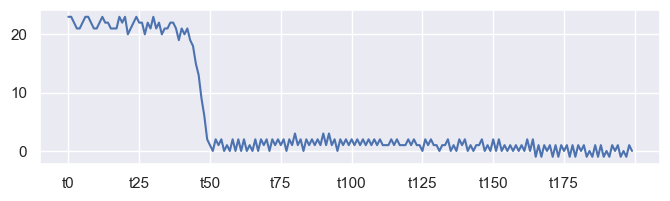

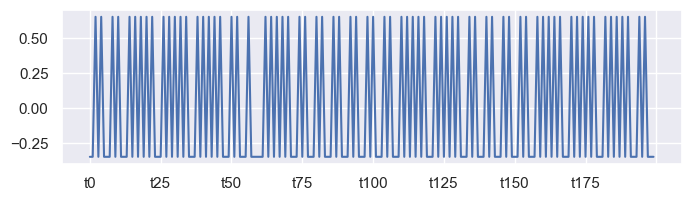

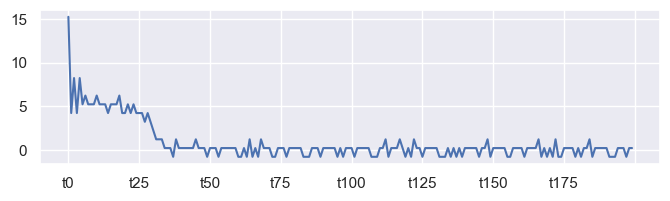

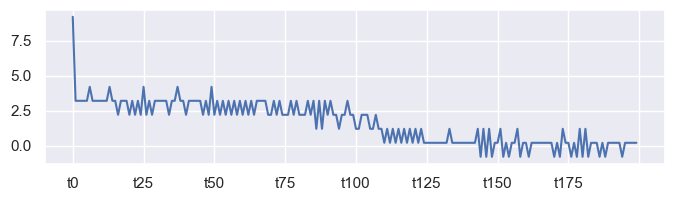

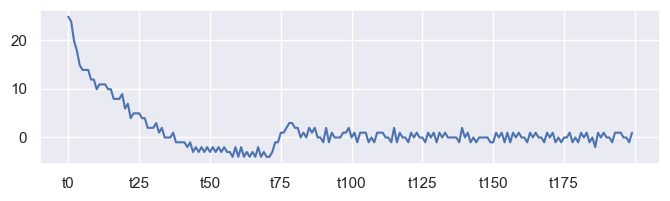

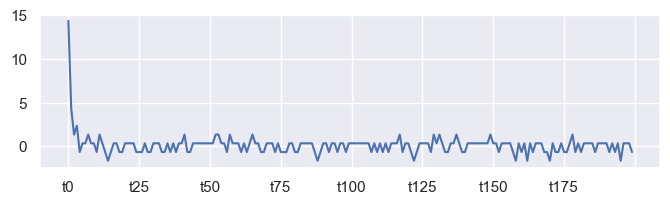

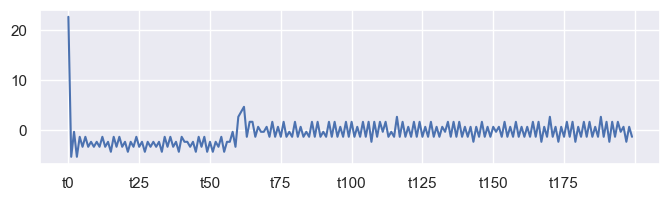

In [242]:
for classe in range (1,8):
    PlotGraf(df, classe, 1)

In [243]:
labels_1 = df['Classes'].values.reshape(-1, 1)  
encoder = OneHotEncoder(sparse_output=False)  # sparse=False para retornar um array
labels_ = encoder.fit_transform(labels_1)

In [244]:
labels_ #transformou em multiclasses

array([[1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0.],
 

In [245]:
X = df.drop('Classes', axis=1)
y = labels_

In [246]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

In [247]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)   

In [248]:
clf = MLPClassifier(random_state=1,hidden_layer_sizes= (20,),learning_rate_init=0.001, max_iter=100,
                    verbose=True).fit(X_train, y_train)

Iteration 1, loss = 5.07403074
Iteration 2, loss = 4.89271494
Iteration 3, loss = 4.72610018
Iteration 4, loss = 4.57205651
Iteration 5, loss = 4.43120527
Iteration 6, loss = 4.30106028
Iteration 7, loss = 4.18284716
Iteration 8, loss = 4.07320849
Iteration 9, loss = 3.96994410
Iteration 10, loss = 3.87227308
Iteration 11, loss = 3.77949565
Iteration 12, loss = 3.69284025
Iteration 13, loss = 3.61125360
Iteration 14, loss = 3.53394922
Iteration 15, loss = 3.45953658
Iteration 16, loss = 3.38765512
Iteration 17, loss = 3.31848998
Iteration 18, loss = 3.25204292
Iteration 19, loss = 3.18766788
Iteration 20, loss = 3.12662673
Iteration 21, loss = 3.06869714
Iteration 22, loss = 3.01271854
Iteration 23, loss = 2.95833778
Iteration 24, loss = 2.90578025
Iteration 25, loss = 2.85494645
Iteration 26, loss = 2.80579842
Iteration 27, loss = 2.75803062
Iteration 28, loss = 2.71176072
Iteration 29, loss = 2.66682382
Iteration 30, loss = 2.62287886
Iteration 31, loss = 2.58043517
Iteration 32, los

c:\Users\laiss\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [249]:
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.6666666666666666


In [250]:
#testando no gridsearch 
parameters = {
    'hidden_layer_sizes': [(10,), (20,), (30,), (50)],  # Testando diferentes tamanhos de camadas ocultas
    'learning_rate_init': [0.001, 0.01, 0.1],     # Testando diferentes taxas de aprendizagem inicial
    'max_iter': [200, 300, 500]                   # Testando diferentes números máximos de iterações
}


In [251]:
grid_search = GridSearchCV(clf, parameters, n_jobs=-1, cv=5)

In [252]:
grid_search.fit(X_train, y_train)


Iteration 1, loss = 5.07403074
Iteration 2, loss = 3.92832264
Iteration 3, loss = 3.26801233
Iteration 4, loss = 2.75828290
Iteration 5, loss = 2.36110416
Iteration 6, loss = 2.03904842
Iteration 7, loss = 1.77396865
Iteration 8, loss = 1.55294414
Iteration 9, loss = 1.36575174
Iteration 10, loss = 1.20107556
Iteration 11, loss = 1.05878425
Iteration 12, loss = 0.93872903
Iteration 13, loss = 0.83952393
Iteration 14, loss = 0.75065686
Iteration 15, loss = 0.66768138
Iteration 16, loss = 0.59092168
Iteration 17, loss = 0.52443433
Iteration 18, loss = 0.47221059
Iteration 19, loss = 0.42818634
Iteration 20, loss = 0.39048834
Iteration 21, loss = 0.35645209
Iteration 22, loss = 0.32564241
Iteration 23, loss = 0.29749850
Iteration 24, loss = 0.27139104
Iteration 25, loss = 0.24711442
Iteration 26, loss = 0.22445926
Iteration 27, loss = 0.20390234
Iteration 28, loss = 0.18544917
Iteration 29, loss = 0.16921871
Iteration 30, loss = 0.15500418
Iteration 31, loss = 0.14253389
Iteration 32, los

GridSearchCV(cv=5,
             estimator=MLPClassifier(hidden_layer_sizes=(20,), max_iter=100,
                                     random_state=1, verbose=True),
             n_jobs=-1,
             param_grid={'hidden_layer_sizes': [(10,), (20,), (30,), 50],
                         'learning_rate_init': [0.001, 0.01, 0.1],
                         'max_iter': [200, 300, 500]})

In [253]:
# Imprimindo os melhores parâmetros encontrados
print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)

# Avaliando o desempenho do modelo com os melhores parâmetros no conjunto de teste
best_clf = grid_search.best_estimator_
accuracy = best_clf.score(X_test, y_test)
print("Acurácia no conjunto de teste com melhores parâmetros:", accuracy)

Melhores parâmetros encontrados:
{'hidden_layer_sizes': (20,), 'learning_rate_init': 0.01, 'max_iter': 200}
Acurácia no conjunto de teste com melhores parâmetros: 0.8666666666666667


Comparando o antigo ML de 0,66 com novo proposto com os parâmetros do GridSearch tivemos um aumento de 0,2 na acurácia.

In [254]:
# Avaliando o desempenho do modelo com os melhores parâmetros no conjunto de teste
y_pred = best_clf.predict(X_test) # relatório de classificação para avaliar as outras métricas
print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.67      0.80         6
           2       1.00      0.78      0.88         9
           3       1.00      1.00      1.00         0
           4       0.75      1.00      0.86         6
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         0

   micro avg       0.93      0.87      0.90        30
   macro avg       0.96      0.92      0.93        30
weighted avg       0.95      0.87      0.89        30
 samples avg       0.93      0.87      0.87        30



Esses resultados servem para avaliar o modelo em várias métricas. No geral o modelo atende bem em várias classes, apenas na classe 2 e na Classe 1 que não consegue corresponder em todas as amostras. 

PCA

In [255]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.multioutput import MultiOutputClassifier

In [256]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

In [257]:
pca = PCA(n_components=2)  # Reduzir para 2 dimensões para visualização
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [258]:
clf_pca = MLPClassifier(random_state=1,hidden_layer_sizes= (20,),learning_rate_init=0.01, max_iter=200, #colocando com os melhores hiperparâmetros do gridsearch.
                    verbose=True).fit(X_train_pca, y_train)

Iteration 1, loss = 19.65998859
Iteration 2, loss = 15.59455352
Iteration 3, loss = 12.28720510
Iteration 4, loss = 9.73300691
Iteration 5, loss = 7.80529943
Iteration 6, loss = 6.37053248
Iteration 7, loss = 5.43005375
Iteration 8, loss = 4.84401721
Iteration 9, loss = 4.44695353
Iteration 10, loss = 4.12982173
Iteration 11, loss = 3.87154582
Iteration 12, loss = 3.66731098
Iteration 13, loss = 3.50403918
Iteration 14, loss = 3.35492907
Iteration 15, loss = 3.19535123
Iteration 16, loss = 3.02289920
Iteration 17, loss = 2.83969239
Iteration 18, loss = 2.65280455
Iteration 19, loss = 2.49340147
Iteration 20, loss = 2.39270851
Iteration 21, loss = 2.35029162
Iteration 22, loss = 2.32570067
Iteration 23, loss = 2.29267378
Iteration 24, loss = 2.24076930
Iteration 25, loss = 2.17649755
Iteration 26, loss = 2.11716649
Iteration 27, loss = 2.08273498
Iteration 28, loss = 2.07253262
Iteration 29, loss = 2.06952614
Iteration 30, loss = 2.05065839
Iteration 31, loss = 2.00999713
Iteration 32, 

c:\Users\laiss\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [259]:
accuracy = clf_pca.score(X_test_pca, y_test)
accuracy

0.7

In [260]:
svm = SVC()

# Crie um classificador multirrótulo com o modelo SVM
multioutput_classifier = MultiOutputClassifier(svm, n_jobs=-1)

# Treine o classificador multirrótulo com os dados de treinamento
multioutput_classifier.fit(X_train_pca, y_train)

# Faça previsões
y_pred_with_pca = multioutput_classifier.predict(X_test_pca)

# Avalie o desempenho
print("\nRelatório de Classificação com PCA:")
print(classification_report(y_test, y_pred_with_pca, zero_division=1))


Relatório de Classificação com PCA:
              precision    recall  f1-score   support

           0       1.00      0.71      0.83         7
           1       1.00      0.00      0.00         6
           2       0.67      0.44      0.53         9
           3       1.00      1.00      1.00         0
           4       1.00      0.00      0.00         6
           5       1.00      0.00      0.00         2
           6       1.00      1.00      1.00         0

   micro avg       0.82      0.30      0.44        30
   macro avg       0.95      0.45      0.48        30
weighted avg       0.90      0.30      0.35        30
 samples avg       0.93      0.30      0.30        30



Como mostram os resultados, a diminuição da dimensão com o PCA não melhorou o modelo. O recall foi pior em várias as classes e a acuracia caiu para 0,7. Então podemos concluir que nesse problema usar o PCA não foi satisfatorio. 